## 机器学习算法基础

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from visualization import plot_pic
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；

### 1.数据集生成及特征工程处理

In [2]:
# 生成测试数据集
from produce_data import produce_data
data = produce_data()

In [3]:
data.head()

,practice,time_period,error,label
0,0.548814,0.592880,0.811518,1.0
1,0.715189,0.010064,0.476084,0.0
2,0.602763,0.475826,0.523156,1.0
3,0.544883,0.708770,0.250521,1.0
4,0.423655,0.043975,0.605043,0.0


In [4]:
# 准备训练集，测试集数据, 核心掌握；
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = \
train_test_split(data[['practice', 'time_period']], data['label'], test_size=0.25, random_state = 52)

In [5]:
features_train.tail()

,practice,time_period
86,0.523248,0.042906
151,0.868126,0.633987
525,0.372679,0.908248
779,0.844235,0.844470
668,0.713767,0.092851


In [6]:
len(features_train)

750

In [7]:
label_train.tail()

86     0.0
151    1.0
525    1.0
779    1.0
668    0.0
Name: label, dtype: float64

In [8]:
#把训练集的属性和标签合并在一起；也可以用merge合并；train_data是用于后续的可视化；
train_data = features_train.copy()     #通过.copy(), train_data和features_train就不会相互影响了；
train_data['label'] = label_train
train_data.head()

,practice,time_period,label
771,0.244889,0.528742,0.0
125,0.606393,0.997994,1.0
837,0.049349,0.430181,0.0
53,0.102045,0.256114,0.0
394,0.033305,0.965734,1.0


In [9]:
#为了画图做准备，把训练集中标签是fail和pass的给分开筛选出来；
practice_fail = train_data[train_data['label']==0]['practice']
time_period_fail = train_data[train_data['label']==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

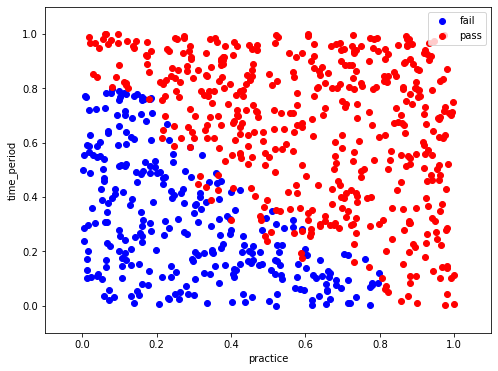

In [10]:
#### 数据集图形可视化
plt.figure(figsize = (8,6))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter(practice_fail, time_period_fail, color = 'b', label='fail')
plt.scatter(practice_pass, time_period_pass, color = 'r', label='pass')
plt.xlabel('practice')
plt.ylabel('time_period')
plt.legend(loc='upper right')

### 2. 逻辑回归算法实现

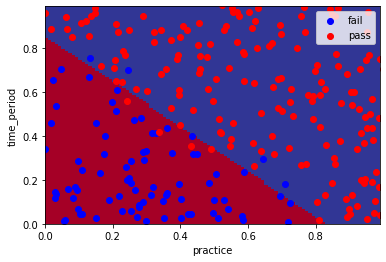

In [11]:
from sklearn.linear_model import LogisticRegression    #从sklearn中引入逻辑回归算法；必背；

clf_LR = LogisticRegression()     #定义了逻辑回归的分类器，clf_LR，初始化模型；
clf_LR.fit(features_train,label_train)     #机器学习的核心语句，必背；fit就是训练和学习的过程；
pred_LR = clf_LR.predict(features_test)     #机器学习的核心语句，必背；predict预测测试集的标签；返回的是预测的测试集的label

#测试集的分类效果可视化；传入已经学习好的分类器和测试集的特征，去预测测试集的标签，并且把分类结果可视化；
plot_pic(clf_LR, features_test, label_test)    

In [12]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_LR, label_test)     #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc

0.972

### 3. SVM支持向量机算法实现

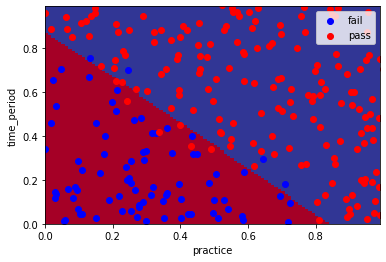

In [13]:
from sklearn.svm import SVC  #SVM下的分类问题；还有SVR；

clf_SVC = SVC()                               #默认的核函数就是rbf；
clf_SVC.fit(features_train,label_train)       #训练；
pred_SVC = clf_SVC.predict(features_test)     #返回是测试集的预测的label；

plot_pic(clf_SVC, features_test, label_test)

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC, label_test)    #拿预测的测试集的label去跟真实的测试集的label去比较、打分
acc

0.96

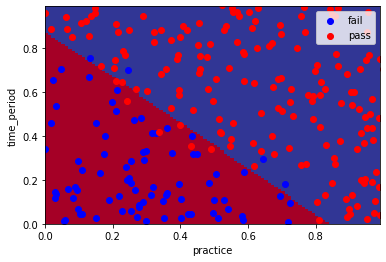

In [15]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'rbf')      #跟默认一样
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [16]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.96

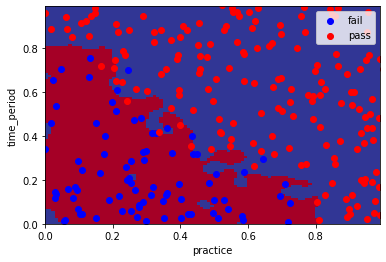

In [17]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'rbf',gamma = 1000 )     #gamma可以自己经验去定义；是用于控制SVM中数据点的距离大小的影响程度。 
clf_SVC2.fit(features_train,label_train)        #如果gamma越大，距离decision boundery距离越近的点权重越大，db受到点的影响越大
pred_SVC2 = clf_SVC2.predict(features_test)     #从而db更趋向于不规则的线； cross validation的思想来帮助我们参数寻优

plot_pic(clf_SVC2, features_test, label_test)

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.94

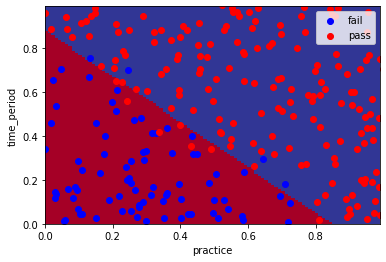

In [19]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'linear')      #kernel 调参
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.956

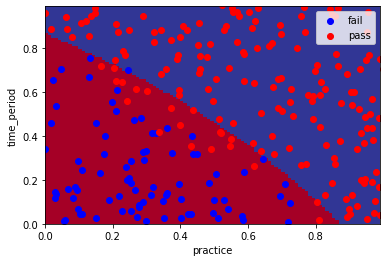

In [21]:
from sklearn.svm import SVC

clf_SVC2 = SVC(kernel = 'poly')      #kernel 调参
clf_SVC2.fit(features_train,label_train)
pred_SVC2 = clf_SVC2.predict(features_test)

plot_pic(clf_SVC2, features_test, label_test)

In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_SVC2, label_test)
acc

0.924

### 4. 决策树算法实现

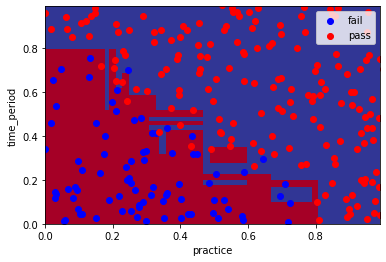

In [23]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(features_train,label_train)
pred_DT = clf_DT.predict(features_test)

plot_pic(clf_DT,features_test, label_test)

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_DT, label_test)
acc

0.948

#### 随机森林的算法实现

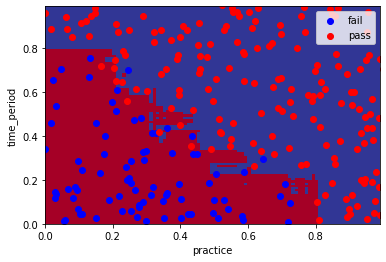

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier()
clf_RF.fit(features_train,label_train)
pred_RF = clf_RF.predict(features_test)

plot_pic(clf_RF,features_test, label_test)

In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_RF, label_test)
acc

0.964

### 5. KNN算法实现

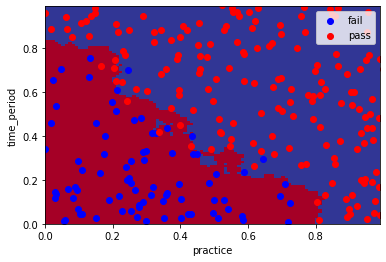

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors= 7)
clf_KNN.fit(features_train,label_train)
pred_KNN = clf_KNN.predict(features_test)

plot_pic(clf_KNN, features_test, label_test)

In [28]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_KNN, label_test)
acc

0.948

### 6. 朴素贝叶斯算法实现

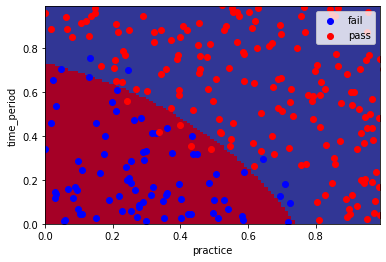

In [29]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()    # 初始化模型， 定义分类器
clf_NB.fit(features_train,label_train)    # 使用训练集对模型进行训练
pred_NB = clf_NB.predict(features_test)    # 使用测试集合对结果进行预测

# 输出可视化图形
plot_pic(clf_NB, features_test, label_test)

In [30]:
# 模型评估
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred_NB, label_test)
acc

0.956